In [65]:
#实现：访问像素值并修改它们 - 访问图像属性 - 设置感兴趣区域(ROI) - 分割和合并图像
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("./Images/img1.jpg")
#BGR图像
'''
cv.namedWindow("image",cv.WINDOW_NORMAL)
cv.imshow("image", img)
cv.waitKey(0)
cv.destroyAllWindows()
'''
#取出某点像素
px = img[100,100]
print(px)

blue = img[100,100,0]
print(blue)

[128 126 126]
128


In [66]:
#同时也可以修改图片的某一像素、
"""
img[100, 100] = [255, 255, 255]
print(img[100, 100])
"""

'\nimg[100, 100] = [255, 255, 255]\nprint(img[100, 100])\n'

In [67]:
#使用numpy更高效的修改图片像素\
"""
print(img.item(100,100,2))
img.itemset((100,100,2), 100)
print(img.item(100,100,2))
"""

'\nprint(img.item(100,100,2))\nimg.itemset((100,100,2), 100)\nprint(img.item(100,100,2))\n'

In [68]:
#访问图像属性：图像行数，列数，通道数。图像数据类型。像素数等
#行、列、通道数：img.shape,可以通过返回值确定是彩图还是灰度图
print(img.shape)
#像素大小：img.size  =  行数 * 列数 * 通道数
print(img.size)
#数据类型：img.dtype
#img.dtype在调试时非常重要，因为OpenCV-Python代码中的大量错误是由无效的数据类型引起的。
print(img.dtype)

(960, 1440, 3)
4147200
uint8


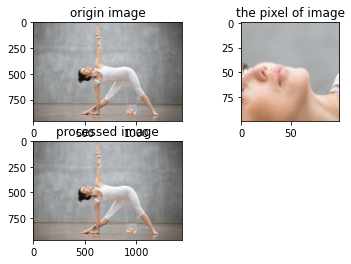

In [69]:
#image ROI
#这里我用的是自己的图片，与官网代码不一样
img3 = img
img2 = img[400:500, 500:600]
#其中400-500为高度范围，500-600为宽度范围
img3[800:900, 900:1000] = img2
"""
cv.namedWindow("image")
cv.imshow("image", img)
cv.waitKey(0)
cv.destroyAllWindows()
"""
#BGR-RGB
img = img[:,:,::-1]
img2 = img2[:,:,::-1]
img3 = img3[:,:,::-1]

#效果对比
plt.subplot(221),plt.imshow(img),plt.title('origin image')
plt.subplot(222),plt.imshow(img2),plt.title('the pixel of image')
plt.subplot(223),plt.imshow(img3),plt.title('processed image')
plt.show()


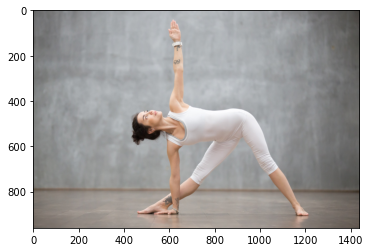

In [70]:
#切割和合并图片
#上一步 img = img[:,:,::-1] 已经将BGR->RGB,这里重新载入
img = cv.imread("./Images/img1.jpg")
b, g, r = cv.split(img)
img = cv.merge((r,g,b))
plt.imshow(img)
plt.show()
#cv.split()是一项耗时的操作（就时间而言）。因此，仅在必要时才这样做。否则请进行Numpy索引。

<function matplotlib.pyplot.show(close=None, block=None)>

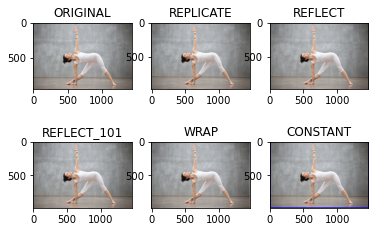

In [71]:
#为图片设置边框
#函数：cv.copyMakeBorder()
#参数：src，top,bottom.,left,right,borderType,value
BLUE = [0,0,255]
img1 = cv.imread("./Images/img1.jpg")

img1 = img1[:,:,::-1]

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show
